In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
csv_file_name = 'all_accounts_unfiltered_w2v.csv'
main_dir_path = os.path.dirname(os.getcwd())
csv_file_path = os.path.join(main_dir_path, 'Data', 'FINAL_DATASETS', csv_file_name)
final_df_1 = pd.read_csv(csv_file_path)
final_df_1 = final_df_1.loc[:, ~final_df_1.columns.str.contains('^Unnamed')]
final_df_1

,accountName,uniqueDomains,uniqueSubreddits,uniqueTitles,numSubmissions,top_1,top_2,top_3,uniqueComments,SubmToCommentRatio,...,comment_w2v_11,comment_w2v_12,comment_w2v_13,comment_w2v_14,comment_w2v_15,comment_w2v_16,comment_w2v_17,comment_w2v_18,comment_w2v_19,comment_w2v_20
0,ModitiusFaetaur,3,5,8,8,5,2,2,1,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,DoppleGun,1,13,29,46,19,13,8,1,46.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,AgaluneMalordred,2,5,8,8,6,5,5,1,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Amohelang,1,1,1,1,1,0,0,1,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,KulazelKelkree,1,2,5,5,1,1,1,1,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,Ozera,39,24,162,164,38,21,16,1185,0.138397,...,-1.669937,-0.835594,-0.177706,-1.002143,-0.340881,-1.003435,0.270984,0.852472,-0.899248,0.129830
2322,dildoodlid,13,14,23,23,8,7,7,251,0.091633,...,-1.409016,-0.328016,-0.192373,-1.079826,-0.201413,-1.082248,0.044926,1.017636,-0.816537,0.840475
2323,cncaudata,8,7,48,50,38,17,15,154,0.324675,...,-1.878195,-0.976064,-0.420159,-0.960458,-0.614904,-1.596627,0.522190,1.009904,-0.619775,-0.286724
2324,cs132,9,11,16,16,8,4,3,22,0.727273,...,-1.884541,-0.792592,-0.140178,-1.498555,-0.469695,-0.748387,0.890630,1.187701,-1.025432,-0.028427


In [3]:
final_df_1.drop(columns= ['label', 'accountName'], inplace=True)
scaler = StandardScaler()
final_df_1 = scaler.fit_transform(final_df_1)
final_df_1

array([[-0.16859083, -0.28660877, -0.1459605 , ..., -1.44713854,
         1.42878396, -0.2201331 ],
       [-0.1754145 , -0.12991078, -0.14473263, ..., -1.44713854,
         1.42878396, -0.2201331 ],
       [-0.17200266, -0.28660877, -0.1459605 , ..., -1.44713854,
         1.42878396, -0.2201331 ],
       ...,
       [-0.15153167, -0.24743428, -0.14362171, ...,  0.4799983 ,
         0.22474828, -0.8225896 ],
       [-0.14811984, -0.16908528, -0.14549274, ...,  0.81927686,
        -0.56332144, -0.27986369],
       [-0.1754145 , -0.36495777, -0.14625285, ...,  1.99807849,
        -0.13117373, -0.17735124]])

In [4]:
tsne = TSNE()
X_embedded = tsne.fit_transform(final_df_1)

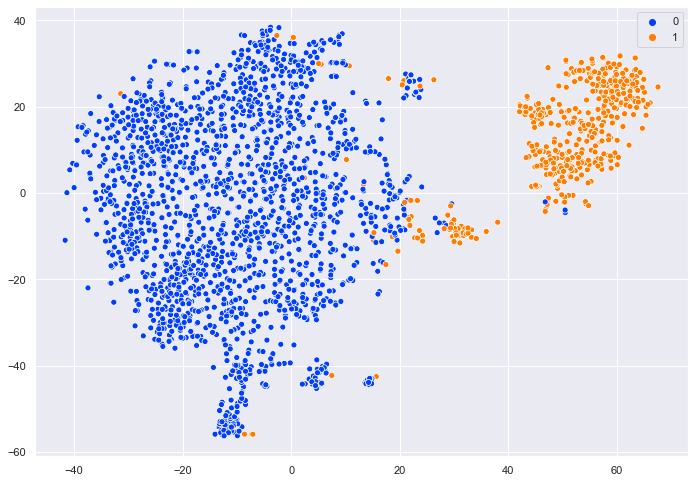

In [5]:
inertia_list = []

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(final_df_1)
y = kmeans.labels_
inertia_list.append(kmeans.inertia_)

# source: https://towardsdatascience.com/t-sne-python-example-1ded9953f26
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

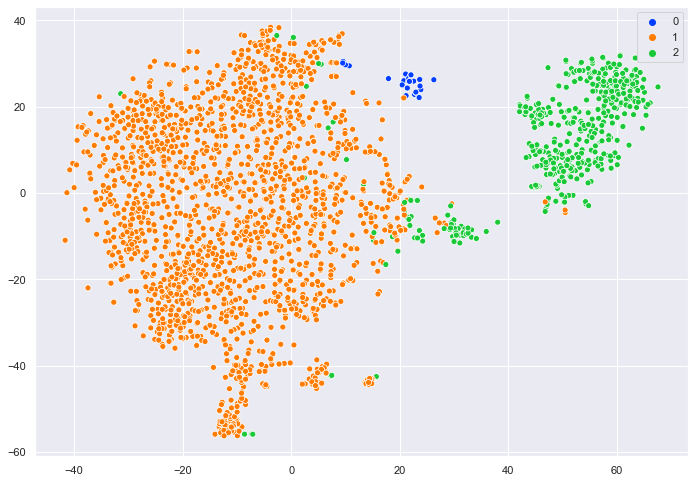

In [6]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(final_df_1)
y = kmeans.labels_
inertia_list.append(kmeans.inertia_)

# source: https://towardsdatascience.com/t-sne-python-example-1ded9953f26
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 3)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

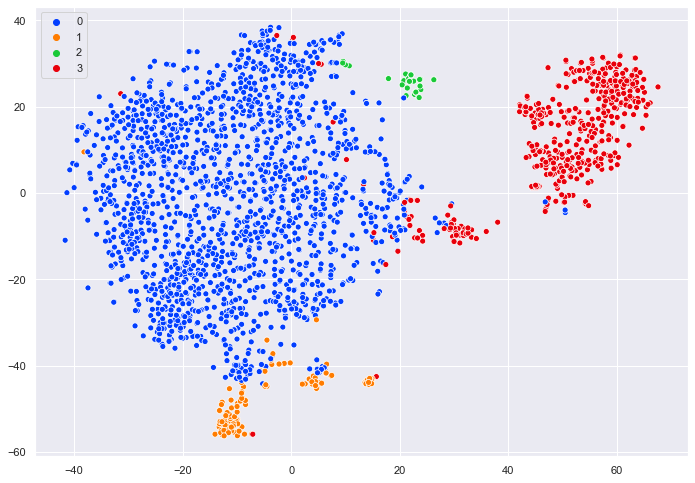

In [7]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(final_df_1)
y = kmeans.labels_
inertia_list.append(kmeans.inertia_)

# source: https://towardsdatascience.com/t-sne-python-example-1ded9953f26
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 4)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

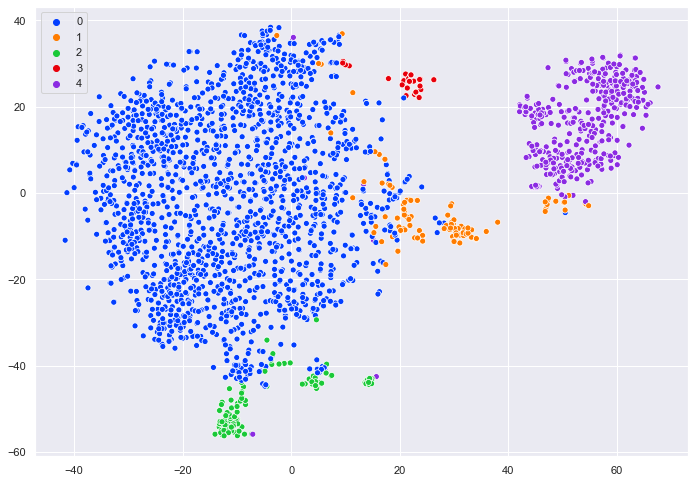

In [8]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(final_df_1)
y = kmeans.labels_
inertia_list.append(kmeans.inertia_)

# source: https://towardsdatascience.com/t-sne-python-example-1ded9953f26
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 5)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

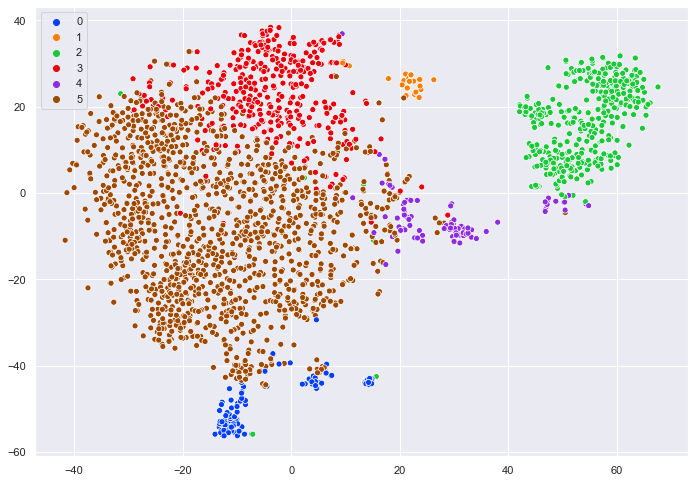

In [9]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(final_df_1)
y = kmeans.labels_
inertia_list.append(kmeans.inertia_)

# source: https://towardsdatascience.com/t-sne-python-example-1ded9953f26
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 6)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

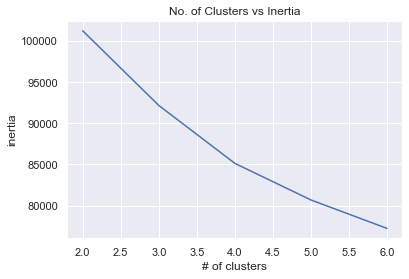

In [10]:
%matplotlib inline
n_clusters = list(range(2, 7))

plt.plot(n_clusters, inertia_list)
plt.xlabel('# of clusters')
plt.ylabel('inertia')

plt.title('No. of Clusters vs Inertia')
plt.show()